### Package and Data Import

In [1]:
import seaborn as sns
import scipy as sc

In [2]:
df = pd.read_csv('inj2020.csv')
df

<IPython.core.display.Javascript object>

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,url
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,adamsst01
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,adebaba01
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,aldrila01
3,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,0.500,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,alexaky01
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,0.524,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,zelleco01
526,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,...,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,zellety01
527,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,0.569,...,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,zizican01
528,Ivica Zubac,C,22,LAC,72,70,18.4,3.3,5.3,0.613,...,2.7,4.8,7.5,1.1,0.2,0.9,0.8,2.3,8.3,zubaciv01


### Cleaning

In [4]:
## Clean up names, split names and URL into respective columns
##Drop duplicates names, keep TOT

In [3]:
# Split names
## Create URL for future use
df['url'] = ''

In [4]:
#Split names and URL into respective columns
for i in range(0, len(df)):
    name = df['Player'][i].split('\\')[0]
    url = df['Player'][i].split('\\')[1]
    df['Player'][i] = name
    df['url'][i] = url

C:\Users\bhuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\bhuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
##Drop duplicates names, keep TOT
df.drop_duplicates(subset=['Player'], keep='first', inplace = True)

In [3]:
# Remove all null FGA, FTA. If you played in the nba you have to have at least 0.0001 FGA or FTA
df.dropna(subset=['FGA', 'FTA'])
# > Fill in null 3PA, 3P as 0
df.fillna(0, inplace = True)
# > 5 games; to weed out the 10 day players; due to uncircumstancial injuries, there tend to
# be a random
df = df[df['G'] > 5]

In [4]:
#make sure everything is good
def find_missing(data):
    # number of missing values
    count_missing = data.isnull().sum().values
    # total records
    total = data.shape[0]
    # percentage of missing
    ratio_missing = count_missing/total
    # return a dataframe to show: feature name, # of missing and % of missing
    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing}, index=data.columns.values)

In [5]:
find_missing(df)

<IPython.core.display.Javascript object>

,missing_count,missing_ratio
Player,0,0.0
Pos,0,0.0
Age,0,0.0
Tm,0,0.0
G,0,0.0
GS,0,0.0
MP,0,0.0
FG,0,0.0
FGA,0,0.0
FG%,0,0.0


### Z-Scoring

In [11]:
####PICK UP HERE
### SCORE Z SCORE BY THE 11 COLUMNS AND ADD IT BACK INTO REGULAR DF

In [6]:
pr = df[['Player','FG%','FGA','FT','FT%','FTA','3P','3P%','3PA','TRB','AST','STL','BLK','TOV','PTS']]
pr.set_index('Player', inplace = True)

In [7]:
for i in range(0,len(pr.columns)):
    pr[pr.columns[i]] = sc.stats.zscore(pr[pr.columns[i]], ddof = 1)

C:\Users\bhuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
pr['FG%_Adj'] = ''
pr['FT%_Adj'] = ''
pr['3P%_Adj'] = ''
pr['PR_sum'] = ''

C:\Users\bhuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\bhuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bhuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [9]:
pr['TOV'] = pr['TOV'] * -1

C:\Users\bhuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
for i in range(0,len(pr)):
    if pr['FT%'][i]<0 and pr['FTA'][i]<0:
        pr['FT%_Adj'][i] = pr['FT%'][i] * pr['FTA'][i] * -1
    else:
        pr['FT%_Adj'][i] = pr['FT%'][i] * pr['FTA'][i]

C:\Users\bhuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\bhuan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\bhuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipyker

In [11]:
for i in range(0,len(pr)):
    if pr['3P%'][i]<0 and pr['3PA'][i]<0:
        pr['3P%_Adj'][i] = pr['3P%'][i] * pr['3PA'][i] * -1
    else:
        pr['3P%_Adj'][i] = pr['3P%'][i] * pr['3PA'][i]

C:\Users\bhuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\bhuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
for i in range(0,len(pr)):
    if pr['FG%'][i]<0 and pr['FGA'][i]<0:
        pr['FG%_Adj'][i] = pr['FG%'][i] * pr['FGA'][i] * -1
    else:
        pr['FG%_Adj'][i] = pr['FG%'][i] * pr['FGA'][i]

C:\Users\bhuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\bhuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
for i in range(0,len(pr)):
    pr['PR_sum'][i] = pr['FG%_Adj'][i] + pr['FT%_Adj'][i] + pr['FT'][i] + pr['3P'][i] + pr['AST'][i] +pr['TRB'][i] + pr['STL'][i] + pr['BLK'][i] + pr['TOV'][i] + pr['PTS'][i]

C:\Users\bhuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
pr

,FG%,FGA,FT,FT%,FTA,3P,3P%,3PA,TRB,AST,STL,BLK,TOV,PTS,FG%_Adj,FT%_Adj,3P%_Adj,PR_sum
Player,,,,,,,,,,,,,,,,,,
Steven Adams,1.551148,0.037531,0.307640,-0.955482,0.736552,-1.163252,0.175866,-1.281715,2.226574,0.157903,0.370727,1.621224,-0.395636,0.264439,0.0582169,-0.703762,-0.22541,2.74407
Bam Adebayo,1.160969,0.759304,1.579705,-0.264118,1.941980,-1.163252,-1.273965,-1.191226,2.591891,1.738786,1.136826,2.102354,-1.996130,1.057235,0.881529,-0.512911,-1.51758,7.41603
LaMarcus Aldridge,0.447499,1.608449,1.085013,0.598501,0.966157,0.234660,0.603185,0.075625,1.455350,0.214363,0.115361,2.824051,-0.272521,1.532912,0.719778,0.578246,0.0456156,8.48721
Nickeil Alexander-Walker,-0.945998,-0.365812,-0.681743,-0.359260,-0.641080,0.001674,0.275065,-0.014865,-0.817733,-0.067938,-0.650739,-0.543866,0.096823,-0.560069,-0.346058,-0.230314,-0.00408878,-3.79996
Grayson Allen,0.146503,-0.174755,-0.328392,0.852213,-0.411474,0.584138,0.717645,0.392337,-0.655370,-0.350238,-0.906105,-0.784431,0.343053,-0.084391,-0.0256021,-0.350664,0.281559,-2.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trae Young,-0.176788,2.839708,4.618526,0.807813,4.238032,2.797497,0.389526,3.016527,0.197036,4.110111,1.136826,-0.784431,-4.458429,3.229496,-0.502027,3.42354,1.17501,13.7681
Cody Zeller,0.793086,0.186132,0.448981,-0.321203,0.679151,-0.813774,-0.533788,-0.693535,1.333578,-0.293778,0.115361,-0.062735,-0.149406,0.296151,0.147618,-0.218145,-0.3702,0.80385
Ante Žižić,1.294745,-0.875299,-0.611073,0.027650,-0.583678,-1.163252,-2.365154,-1.281715,-0.330644,-0.971300,-0.906105,-0.543866,0.835513,-0.766196,-1.13329,-0.0161389,-3.03145,-5.60635


In [15]:
pr.to_csv('injpr.csv', index = True)

<IPython.core.display.Javascript object>

AttributeError: 'float' object has no attribute 'dtype'

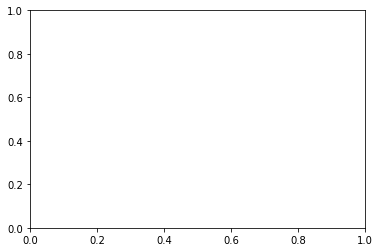

In [20]:
plt.hist(pr['PR_sum'], bins = 50);
#79

<IPython.core.display.Javascript object>

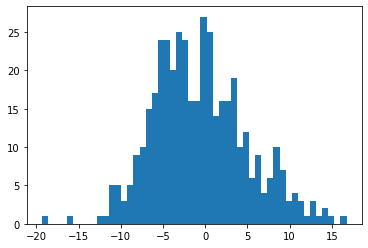

In [42]:
plt.hist(pr['PR_sum'], bins = 50);
#01

<IPython.core.display.Javascript object>

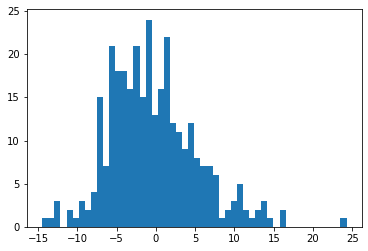

In [21]:
plt.hist(pr['PR_sum'], bins = 50);
#86

<IPython.core.display.Javascript object>

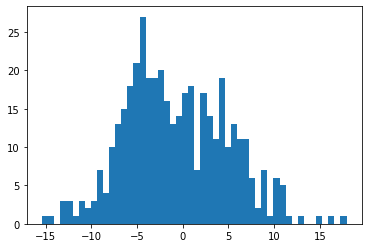

In [36]:
plt.hist(pr['PR_sum'], bins = 50);
#96

<IPython.core.display.Javascript object>

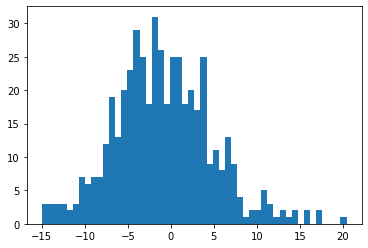

In [199]:
plt.hist(pr['PR_sum'], bins = 50);
#18

<IPython.core.display.Javascript object>

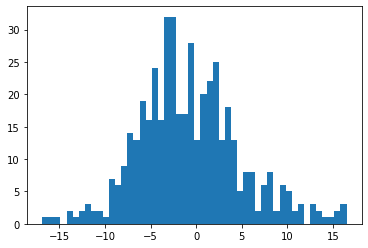

In [217]:
plt.hist(pr['PR_sum'], bins = 50);
#17

In [218]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')

In [220]:
kde.fit(pr['PR_sum'])

ValueError: Expected 2D array, got 1D array instead:
array=[ -3.1065295   -1.98341301   3.09637558  -3.07996251  -3.9737752
  -7.24791607   6.26267396  -4.37553452   3.54601593   3.53744593
  -5.48094603  -6.74294459  -1.42868029  -2.73949155   5.35232384
  13.7950023    6.1362703  -11.59924495   6.95207773  -1.19158071
  -5.13955112  -2.46584527  -2.80492564  -4.19020821  -7.25097744
  -4.49236297  -0.43218815   3.86403431   0.7650872    3.54811736
  -5.58542932   5.26098021  -5.09309741   2.06391404   9.37540545
  -5.69208144  -2.4002083   -0.27825863  -9.23801431  -6.47073827
  -2.92465387  -3.27424018   6.28212756  -2.47675748  -0.77855793
  -2.05718396   7.34566394   0.65704623  -3.80979448  -8.99058296
   3.19822759   3.13179392   6.05115422  -3.32719836   1.2623249
  -4.55954022  -8.78412002  -9.20659495  -3.02572345  -5.36771619
  -2.56608651  -5.5587129   -3.45548081  13.01680279 -11.85907433
  -5.936667     3.5640444   -5.16849252   2.5388649    2.40315804
   1.69027551  -1.43583852  -3.51084828  -2.69838556   0.63094794
   4.27728835   1.49370081  -7.24787946  -6.84661006  -3.26026529
   1.06128066  -6.66814528   1.36775471 -11.07413541   9.43885186
  -7.52779096  -7.00330519  13.23151989   7.73320956   1.02137526
  -0.59917785   1.61768294   5.95722138  -0.64808764   3.03085694
  15.89031856  -0.92026575  16.50127116  -8.87710698  -3.90954382
  -3.59255824  -1.08063595  -4.85836593  -1.75969723   1.5546855
   6.82223831  -4.54880552  -4.29110735   5.49319778  -0.59262772
  -2.90911229   5.80371594   8.43256061  -0.44210326  -3.48027968
  -2.70415639  15.75046279  -7.3677997    1.14141404  -0.53339612
   9.84611009  -0.41357767  -5.42554934   0.02523401  -3.62534804
   1.33384035   2.35338076  -5.41119767  -4.86906668  -1.3790938
   1.00528052  -2.6035306   -7.84125147   2.93578637  -4.129629
  -0.49083055   1.15620243   6.4373746   -0.43665069   8.34748908
   4.24708474   7.92001092 -16.8959467  -12.53845903  10.90819822
  -4.32438441   1.58628489   0.39795139   8.27925287  -4.00690018
   2.99253179   4.83281568   2.34497784  -8.37749499  -1.51142106
  -2.7380677    2.25455935   9.87807141  -4.30626364   2.18629269
  -1.70699943   7.24768957   0.57713136  -7.86055236   2.02891623
  15.673189     3.5835621   -2.42554456  -2.21499734   4.92045966
  -0.60504698   3.80555421  -2.67676852  -7.93057231  -2.13285883
   8.20465917  -1.28316243  -1.00447767  -2.43772606   1.46072797
  -4.09551233  -5.25235586  -0.25217484  -1.30441902   5.19471899
 -10.44518918   0.58894344  -6.51765825   6.04108699  -0.49478571
   1.42812129   2.5143354    0.91413539   7.82450115   3.60235898
  -7.03395041  -2.7104952    7.15568133   1.61011263   3.48258485
   1.15597625  -0.79913578  10.416414    -5.29505161   0.39358998
  11.2428314   -4.28265484  -3.16635217  -0.55189425  -2.8512218
  -0.69952574   4.05131049  -0.48595322  -3.07294733   4.25118279
  -4.72313896   9.86022534  -9.33751476  -3.40981182  -6.62611843
   1.95524742  -3.51952566   4.14732548  -0.75956183   1.98837703
   2.21357579  -8.66388983   3.07402456   0.07905683  -2.066904
   1.41058906  -2.93257564  -2.92775701  -1.45441442  -0.4587849
  -7.46867492  -2.89594439   5.50876519   0.24708002  -7.61331162
   2.41903085  -2.8180107    1.91578743  13.9142281   -2.94743614
   0.60300547  -0.48700365  -5.37098626  11.5351696    3.96698797
  -4.70032722   0.65858422  -5.86835859   8.41905477   1.89873072
  10.97331561  12.57431795  -3.63371822  -1.99419736  -6.42025141
  -2.08703179  -3.07635843  -3.56926297  -5.6995909   -4.2116436
   3.47258005  -2.05586291  -5.8886757   -3.80433856   8.52754662
   0.62234376  -7.97535897  -4.33338283  -2.32410407  -5.92245982
  -0.74768878  -2.5620157   -5.55837772  -2.59494744  -0.07912625
  -5.14524994  -8.89888542   3.91450711   1.93005117  -9.19688169
   0.63861881   7.39502077   3.82221731   1.15511142   0.17326764
   2.25224278   4.16511993  -4.6680367   -3.61022724  -3.43346839
  -0.99683193  -2.02109435  -6.45649354  -0.69795104  -1.22743041
   2.96449878  -4.87265934  -4.70123968   0.6180474   -5.94441165
 -13.22393205  -6.42660882   1.90307736   0.85049992  -0.6796686
 -16.16631327   3.53469452   0.31324528  -3.29767446  -7.46037142
   0.76933474 -13.87029094  -1.82785454   3.9301449    0.49562179
 -15.50666524  -1.41522881  -1.73925753  -5.80628768   6.43605827
  -2.49010024  -2.87309679   1.39168697  11.69365509  -4.20848002
  -4.25366651   3.67747719  -5.70382348  -5.80371396  -9.29378091
   1.67488629  -7.21869906  -7.64753946   8.50923469  -1.99810733
   9.38034397  -0.10267467  -2.06362969   1.94692569  -8.79085144
 -11.16825362  -4.85211338   3.46430099   2.40533168   3.2664973
  -1.96226661   2.62214054  -6.13514196  -0.50488521   2.70946583
  -7.0273083   -1.35896456  -5.30176284  -0.63149297   2.10964621
   2.03024655   1.68694232  -2.04926489   5.52074127 -12.54558675
  -2.72523332   3.66165348  -2.42843946   1.72653544  -4.97831063
   2.1795946   -2.41801713  -7.15797034   2.36242856  -5.05145115
  -7.61436875  -3.72071281  -0.17246051  -3.06505284  -2.94590935
  -5.95256007   3.57007591   0.03967373   2.23006177  -3.18243822
   0.65357232   0.69207742  -4.47143905   0.2971149   -3.78697901
 -13.98785343  -4.22398427  -5.86567126   5.51826119  -2.45262411
   1.72059842  -2.9594023   13.08351587  -2.77710017  -2.60981675
   9.36747463   2.24969765  -2.60309698   0.08347552  15.87312246
   2.52040115  -0.29750138   8.38211425  -4.94369121  -2.29817449
  -3.01197227   3.04863182  -3.08945565  -6.8628405   -8.73684115
  -6.96602677  -2.06888461   7.43974678  -6.22020609   4.64628272
   2.46238985   9.90252004   9.36470711  -2.32428195   4.74973236
  -4.34926579  -5.67386579  -3.23156215  15.12103015  -5.67135929
  -2.24451007   9.23925955   4.16119011 -12.1339609   -1.43986948
  -0.59435566  -3.56416275   4.36719579   4.80684685  -4.81427965
  -2.28606819 -10.66463391   0.87214482  -6.51862661  -6.59072842
  -7.79116145  -4.97087241  -1.35237287  -5.87301903  -8.02386052
   3.44459921   3.68500111   1.47920016  -7.33569747 -10.16932587
  -3.34065244  -3.05413421].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.